# Heat equation

## libs

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from matplotlib import animation
from IPython.display import HTML

## initialization

In [7]:
check=0.5

LAMBDA0 = 0.5
SIGMA = 0.5
LENGTH = 10
DURATION = 50
INITIAL = 0
BOUND = 25

NUMBER_X = 50
NUMBER_T = int(LAMBDA0 * DURATION * NUMBER_X**2 / LENGTH**2 / check)

In [8]:
step_x = LENGTH / (NUMBER_X - 1)
step_t = DURATION / (NUMBER_T - 1)

In [9]:
axis = np.linspace(0, LENGTH, NUMBER_X)
time = np.linspace(0, DURATION, NUMBER_T)

temperature = pd.DataFrame(columns = np.concatenate([['x'], time]))

In [10]:
temperature['x'] = axis
temperature = temperature.set_index('x')

In [11]:
temperature.iloc[:, 0] = INITIAL
temperature.iloc[0] = BOUND * np.power(time, SIGMA)
temperature.iloc[NUMBER_X-1, :] = INITIAL

## main procedure

In [8]:
# pbar = tqdm_notebook(total = NUMBER_T - 1)

# for t in range(0, NUMBER_T - 1):
#     for x in range(1, NUMBER_X - 1):
#         operator = LAMBDA / step_x**2 * (function.iloc[x+1, t] - 2 * function.iloc[x, t] + 
#                                          function.iloc[x-1, t])
#         function.iloc[x, t+1] = step_t * operator + function.iloc[x, t]
#     pbar.update()

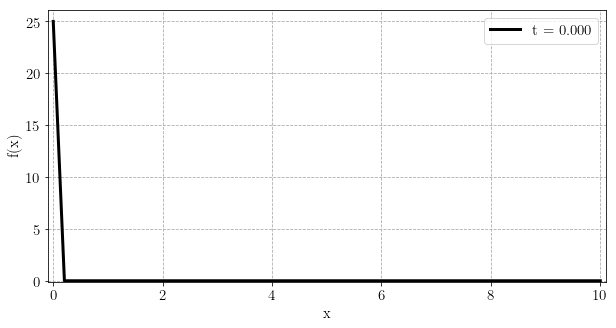

In [46]:
plt.rcParams.update({'font.size': 15})
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'\usepackage[utf8]{inputenc}')
plt.rc('text.latex', preamble=r'\usepackage[english]{babel}')

fig, ax = plt.subplots(figsize=(10, 5))
ax.axis([-0.1, LENGTH + 0.1, -0.1, BOUND + 1.1])

l1, = ax.plot(function.index, function.iloc[:, NUMBER_T - 1], lw=3, color='black', label=NUMBER_T)
#l2, = ax.plot([ LAMBDA * float(function.columns[20]), LAMBDA * float(function.columns[20])],[0, BOUND], lw=3, color='blue', label=None)

ax.grid(c='#aaaaaa', ls='--')

ax.set_ylabel("f(x)")
ax.set_xlabel("x")

def animate(i):
    l1.set_data(function.index, function.iloc[:, i])
    l1.set_label('t = ' + '%.3f' %(i * step_t))
    #l2.set_data([A * float(function.columns[i+1]), A * float(function.columns[i+1])],[0, BOUND])

    legend = plt.legend(loc='upper right')
    return l1, #l2, legend

ani = animation.FuncAnimation(fig, animate, frames= np.arange(0, NUMBER_T - 1, 15), interval=50)

#ani.save("solution.mp4")
HTML(ani.to_jshtml())